## 딥러닝 한번에 끝내기
### 7. 모델 크기 조절과 규제

### 7-1. 들어가며

![](./img07/01.png)

![](./img07/02.png)

#### 과정 개요

모델 크기 조절
모델의 크기는 어떤 것으로 결정되는지 살펴보고 크기에 따라 어떤 차이가 있는지 알아봅니다.

규제화(Regularization)
모델 학습에 규제를 가하는 것의 의미를 알아보고 실습을 통해 어떤 효과가 있는지 확인해봅니다.

드롭아웃(Dropout)
s 드롭아웃은 어떤 작업을 하는 것이며 그 효과에 대해 실습을 통해 알아봅니다.

#### 학습 목표

딥러닝 모델의 크기를 조절해봅니다.

효과적인 딥러닝 모델 학습을 위한 규제를 해봅니다.

![](./img07/03.png)

이전에 사용했던 IMDB 딥러닝 모델은 과대적합이 발생하는 문제가 있었습니다. 이 문제를 해결하려면 모델의 크기를 조절해야 합니다.

모델 크기를 조절하는 방법은 크게 레이어의 유닛수와 레이어의 수를 조절하는 것이 있습니다.

우선 레이어의 유닛수를 증가 또는 감소시켜 모델 전체 파라미터 수를 증가하거나 감소시킬 수 있습니다. 다른 방법으로는 레이어의 수를 증가시켜 더 깊은 신경망을 만들어 모델의 크기를 증가시킬 수 있죠.

데이터의 규모가 클수록 크고 깊은 모델에서 더 좋은 성능을 보여주지만 데이터에 비해 모델이 너무 크면 과대적합이 발생할 수 있습니다. 따라서 데이터의 규모에 따라 모델의 수를 적절하게 조절해야 합니다.

모델의 크기 조절 방법에 따라 모델 성능의 결과가 어떻게 차이가 나는지 비교해 보도록 하겠습니다.

#### 데이터 로드 및 전처리

먼저 모델의 학습에 사용하기 위해 원-핫 인코딩(one-hot encoding)을 위한 함수를 정의합니다. 그리고 imdb.load_data()를 통해 IMDB 데이터를 다운로드한 뒤, 10000 차원의 학습 데이터로 원-핫 인코딩을 수행합니다.

In [1]:
from keras.datasets import imdb
import numpy as np

def one_hot_encoding(data, dim=10000): # 아래 imdb.load_data의 num_words를 10000으로 설정할 예정이기 때문에 dim도 10000으로 맞춰줍니다.
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

2023-08-08 17:41:11.783320: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### 모델 구성 및 컴파일

IMDB 데이터셋에 대해 분류하는 모델로서 기존에 정의했던 3개의 Dense 레이어를 가지는 딥러닝 모델을 정의합니다. 그리고 rmsprop 옵티마이저, binary_crossentropy 손실 함수, accuracy 지표를 사용하도록 컴파일 합니다.

summary()를 통해 확인해보면, 모델의 전체 파라미터의 수가 1,296,769개인 것을 알 수 있습니다.

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 output (Dense)              (None, 1)                 129       
                                                                 
Total params: 1296769 (4.95 MB)
Trainable params: 1296769 (4.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 모델 학습

딥러닝 모델을 fit()을 이용해 학습시킵니다.

In [3]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 4s 65ms/step - loss: 0.4592 - accuracy: 0.7704 - val_loss: 0.3559 - val_accuracy: 0.8487
Epoch 2/30
49/49 [==============================] - 1s 25ms/step - loss: 0.2631 - accuracy: 0.8960 - val_loss: 0.2773 - val_accuracy: 0.8864
Epoch 3/30
49/49 [==============================] - 1s 25ms/step - loss: 0.2110 - accuracy: 0.9190 - val_loss: 0.2759 - val_accuracy: 0.8864
Epoch 4/30
49/49 [==============================] - 1s 25ms/step - loss: 0.1663 - accuracy: 0.9358 - val_loss: 0.3494 - val_accuracy: 0.8668
Epoch 5/30
49/49 [==============================] - 1s 27ms/step - loss: 0.1298 - accuracy: 0.9513 - val_loss: 0.4486 - val_accuracy: 0.8396
Epoch 6/30
49/49 [==============================] - 1s 26ms/step - loss: 0.1017 - accuracy: 0.9636 - val_loss: 0.4756 - val_accuracy: 0.8458
Epoch 7/30
49/49 [==============================] - 1s 25ms/step - loss: 0.0799 - accuracy: 0.9726 - val_loss: 0.3596 - val_accuracy: 0.8768
Epoch 8/30
49

모델의 지표 결과로 loss, val_loss, accuracy, val_accuracy를 차트로 살펴봅니다.

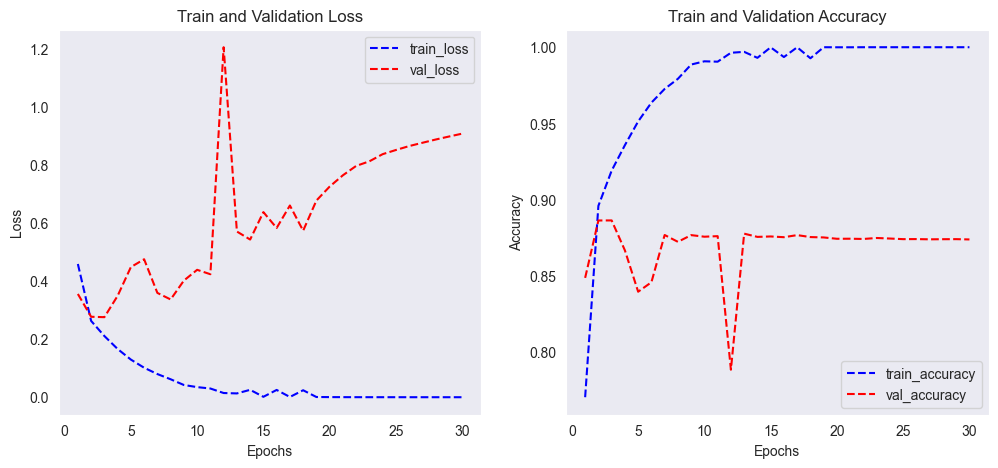

In [4]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

결과를 보면, 딥러닝 모델이 과대적합된 상태인 것을 알 수 있습니다. 따라서 과대적합을 해결하기 위한 방법을 찾아야합니다.

#### 모델 크기 증가

먼저 모델의 크기를 증가시키면 어떻게 될지 살펴 보겠습니다. Dense 레이어의 유닛수를 128에서 2048로 크게 증가시켜서 모델의 전체 파라미터 수가 24,680,449개가 되었습니다.

In [5]:
b_model = models.Sequential()
b_model.add(layers.Dense(2048, activation='relu', input_shape=(10000, ), name='input3'))
b_model.add(layers.Dense(2048, activation='relu', name='hidden3'))
b_model.add(layers.Dense(1, activation='sigmoid', name='output3'))
b_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
b_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input3 (Dense)              (None, 2048)              20482048  
                                                                 
 hidden3 (Dense)             (None, 2048)              4196352   
                                                                 
 output3 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 24680449 (94.15 MB)
Trainable params: 24680449 (94.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
b_model_history = b_model.fit(x_train, y_train,
                              epochs=30,
                              batch_size=512,
                              validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 17s 342ms/step - loss: 0.5492 - accuracy: 0.7254 - val_loss: 0.3803 - val_accuracy: 0.8347
Epoch 2/30
49/49 [==============================] - 15s 306ms/step - loss: 0.2932 - accuracy: 0.8802 - val_loss: 0.2717 - val_accuracy: 0.8881
Epoch 3/30
49/49 [==============================] - 15s 309ms/step - loss: 0.2179 - accuracy: 0.9140 - val_loss: 0.2697 - val_accuracy: 0.8873
Epoch 4/30
49/49 [==============================] - 15s 297ms/step - loss: 0.1602 - accuracy: 0.9404 - val_loss: 0.2934 - val_accuracy: 0.8860
Epoch 5/30
49/49 [==============================] - 14s 296ms/step - loss: 0.1270 - accuracy: 0.9530 - val_loss: 0.3039 - val_accuracy: 0.8848
Epoch 6/30
49/49 [==============================] - 15s 298ms/step - loss: 0.0816 - accuracy: 0.9717 - val_loss: 0.3593 - val_accuracy: 0.8821
Epoch 7/30
49/49 [==============================] - 15s 306ms/step - loss: 0.0672 - accuracy: 0.9771 - val_loss: 0.3297 - val_accuracy: 0.8801

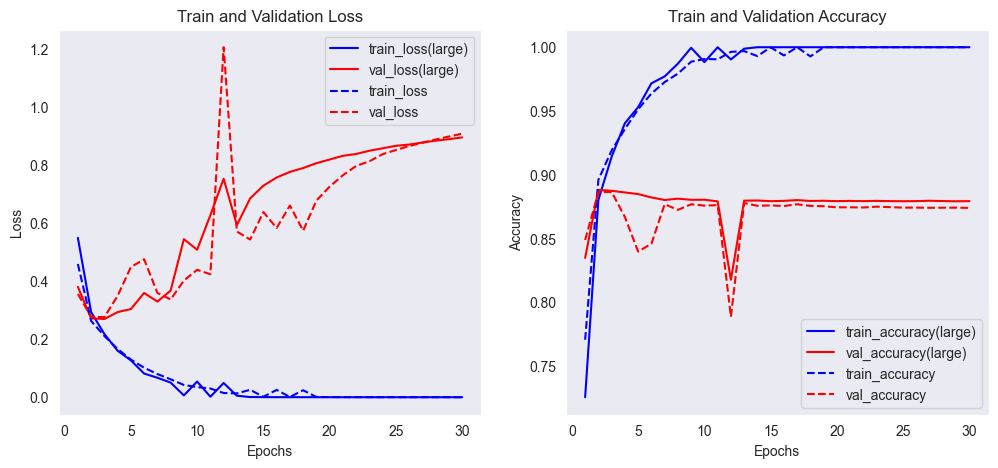

In [7]:
b_history_dict = b_model_history.history

b_loss = b_history_dict['loss']
b_val_loss = b_history_dict['val_loss']
epochs = range(1, len(b_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

b_accuracy = b_history_dict['accuracy']
b_val_accuracy = b_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

결과를 보면, 모델의 크기가 클수록, 즉 파라미터 수가 많은 신경망일수록 빠르게 훈련 데이터 모델링이 가능하고, 학습 손실이 낮아지는 것을 알 수 있습니다. 그러나 모델이 과대적합에는 더욱 민감해지는 것을 학습-검증 데이터 손실을 통해 확인이 가능합니다.

#### 모델 크기 감소

이제 모델에서 사용한 Dense 레이어의 유닛수를 128대신 16으로 줄여서 사용합니다. 즉, 모델의 크기를 줄여서 전체 파라미터의 수가 160,305개로 줄어들게 됩니다.

In [8]:
s_model = models.Sequential()
s_model.add(layers.Dense(16, activation='relu', input_shape=(10000, ), name='input2'))
s_model.add(layers.Dense(16, activation='relu', name='hidden2'))
s_model.add(layers.Dense(1, activation='sigmoid', name='output2'))
s_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
s_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input2 (Dense)              (None, 16)                160016    
                                                                 
 hidden2 (Dense)             (None, 16)                272       
                                                                 
 output2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
s_model_history = s_model.fit(x_train, y_train,
                              epochs=30,
                              batch_size=512,
                              validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 3s 49ms/step - loss: 0.4692 - accuracy: 0.8142 - val_loss: 0.3703 - val_accuracy: 0.8568
Epoch 2/30
49/49 [==============================] - 1s 14ms/step - loss: 0.2778 - accuracy: 0.9019 - val_loss: 0.2877 - val_accuracy: 0.8884
Epoch 3/30
49/49 [==============================] - 1s 14ms/step - loss: 0.2180 - accuracy: 0.9214 - val_loss: 0.2770 - val_accuracy: 0.8894
Epoch 4/30
49/49 [==============================] - 1s 17ms/step - loss: 0.1855 - accuracy: 0.9332 - val_loss: 0.2821 - val_accuracy: 0.8879
Epoch 5/30
49/49 [==============================] - 1s 15ms/step - loss: 0.1636 - accuracy: 0.9416 - val_loss: 0.2931 - val_accuracy: 0.8852
Epoch 6/30
49/49 [==============================] - 1s 15ms/step - loss: 0.1458 - accuracy: 0.9489 - val_loss: 0.3064 - val_accuracy: 0.8825
Epoch 7/30
49/49 [==============================] - 1s 14ms/step - loss: 0.1332 - accuracy: 0.9524 - val_loss: 0.3242 - val_accuracy: 0.8775
Epoch 8/30
49

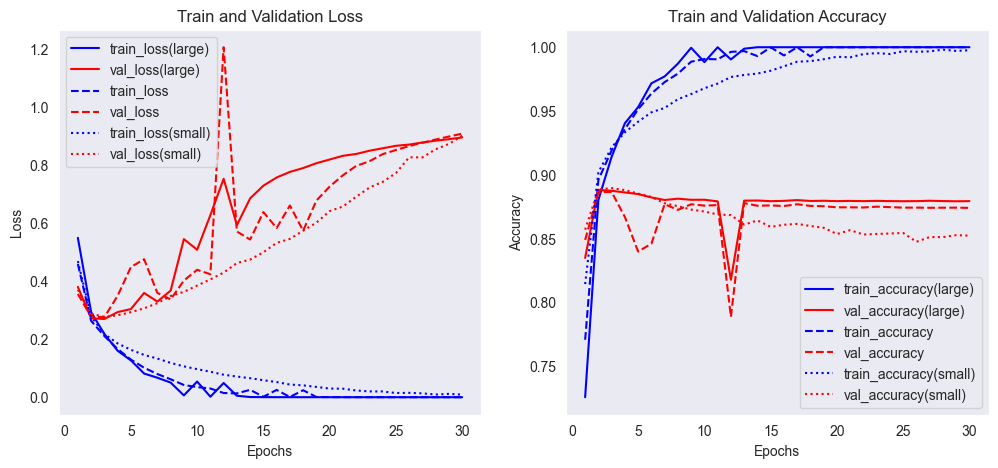

In [10]:
s_history_dict = s_model_history.history

s_loss = s_history_dict['loss']
s_val_loss = s_history_dict['val_loss']
epochs = range(1, len(s_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.plot(epochs, s_loss, 'b:', label='train_loss(small)')
ax1.plot(epochs, s_val_loss, 'r:', label='val_loss(small)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

s_accuracy = s_history_dict['accuracy']
s_val_accuracy = s_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.plot(epochs, s_accuracy, 'b:', label='train_accuracy(small)')
ax2.plot(epochs, s_val_accuracy, 'r:', label='val_accuracy(small)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

모델의 크기를 줄였더니 과대적합 문제에 조금 덜 민감한 것을 알 수 있습니다. 즉, 모델의 최적화를 위해서는 파라미터 수를 적절하게 조절 해야 된다는 것을 알 수 있습니다.

### 7-3. 규제(Regularization)

![](./img07/04.png)

![](./img07/05.png)

![](./img07/06.png)

모델의 과대적합을 방지하는 방법 중에 하나로 규제가 있습니다. 가중치의 파라미터 값이 커서 과대적합이 발생하는 경우가 많기 때문에 이를 방지하기 위해 큰 가중치 값은 큰 규제를 가하는 방법이 규제화입니다. 규제를 통해 가중치의 절댓값을 가능한 작게 만들어서 가중치의 모든 원소를 0에 가깝게 하여 모든 특성이 출력에 주는 영향을 최소한으로 만드는 것을 의미합니다. 즉, 기울기를 작게 만드는 과정이 되겠습니다.

규제를 통해서 가중치의 분포가 더 균일하게 되고, 복잡한 네트워크일수록 네트워크의 복잡도에 제한을 두어 가중치가 작은 값을 가지도록 합니다. 규제가 모델이 과대적합 되지 않도록 강제로 제한하는 역할을 하므로 적절한 규제값을 찾는 것이 중요합니다.

모델의 손실함수에서 큰 가중치에 비용을 추가하는 형태로 규제를 적용할 수 있으며 대표적인 방법으로 L1 규제와 L2 규제가 있습니다. L1 규제는 가중치의 절댓값에 비례하는 비용이 추가되고, L2 규제는 가중치 감쇠(weight decay)라고도 불리며, 가중치의 제곱에 비례하는 비용이 추가됩니다. 또한, L1과 L2를 둘다 합쳐서 사용하는 경우도 존재합니다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/on-dlf-7-3-6.max-800x600.png)

#### L1 규제

L1 규제는 가중치의 절댓값 합에 비례하는 비용을 손실 함수에 추가 하는 방법이며, 가중치의 절대값은 L1 노름(norm) 이라고 하며 다음과 같이 표현됩니다.

$$
||w||_1 = \sum_{i}|w_i|
$$

전체 비용은 다음과 같이 기존의 손실 함수 L에 α를 곱한 L1 규제를 적용하여 계산할 수 있습니다.

$$
Cost = $\frac{1}{n}\sum_{i=1}^{n} {L(y_{i}, \hat{y}_{i})} + {\alpha}\sum_{j=1}^{m}|w_j|$
$$

$$
L({y_{i}, \hat{y}_{i}) : 손실함수(Loss function)
$$

α 값을 이용하여 사용자가 하이퍼파라미터처럼 규제의 조절이 가능합니다. 먼저 α 값을 증가시키면 규제가 강해져서 가중치 절댓값의 합을 줄이도록 학습하여 가중치가 0인 중요하지 않은 것들을 제외되어 일반화에 적합하게 됩니다. 반면 α 값을 감소시키면 규제가 약해져서 가중치 값이 증가하고 과대적합이 발생할 수 있습니다.

케라스에서 L1 규제를 사용하기 위해서는 적용할 레이어에서 kernel_regularizer를 l1으로 지정해주면 됩니다. 물론 레이어에 bias_regularizer와 activity_regularizer에도 적용할 수 있습니다.

케라스에서 L1 규제를 사용하기 위해서는 적용할 레이어에서 가중치 정규화인 kernel_regularizer를 l1으로 지정해주면 됩니다. 물론 레이어에 편향 정규화인 bias_regularizer와 출력값 정규화인 activity_regularizer에도 적용할 수 있습니다.

In [11]:
l1_model =  models.Sequential()
l1_model.add(layers.Dense(16,
                          kernel_regularizer='l1',
                          activation='relu',
                          input_shape=(10000, )))
l1_model.add(layers.Dense(16,
                          kernel_regularizer='l1',
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
l1_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=30,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 3s 58ms/step - loss: 3.7162 - accuracy: 0.5790 - val_loss: 1.9112 - val_accuracy: 0.5312
Epoch 2/30
49/49 [==============================] - 1s 15ms/step - loss: 1.8430 - accuracy: 0.6641 - val_loss: 1.7821 - val_accuracy: 0.6976
Epoch 3/30
49/49 [==============================] - 1s 15ms/step - loss: 1.7433 - accuracy: 0.7083 - val_loss: 1.7075 - val_accuracy: 0.7543
Epoch 4/30
49/49 [==============================] - 1s 16ms/step - loss: 1.6581 - accuracy: 0.7427 - val_loss: 1.6051 - val_accuracy: 0.7593
Epoch 5/30
49/49 [==============================] - 1s 16ms/step - loss: 1.5801 - accuracy: 0.7646 - val_loss: 1.5543 - val_accuracy: 0.7700
Epoch 6/30
49/49 [==============================] - 1s 15ms/step - loss: 1.5137 - accuracy: 0.7774 - val_loss: 1.4737 - val_accuracy: 0.7816
Epoch 7/30
49/49 [==============================] - 1s 17ms/step - loss: 1.4616 - accuracy: 0.7894 - val_loss: 1.4507 - val_accuracy: 0.7949
Epoch 8/30
49

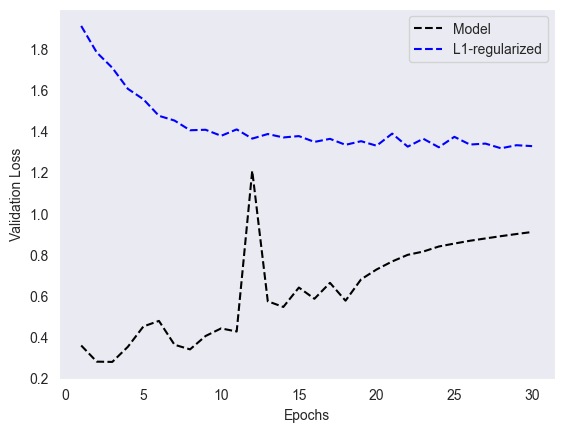

In [13]:
l1_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

기존 모델의 결과와 L1 규제를 사용한 결과를 비교해보면, 기존 모델은 Loss 값이 점점 증가하며 과대적합의 모습을 보이는 반면, L1 규제 결과는 안정적으로 Loss 값이 감소되는 것을 알 수 있습니다.

####  L2 규제


L2 규제는 가중치의 제곱에 비례하는 비용을 손실 함수의 일정 값에 더하는 방법 이며, 가중치의 제곱은 L2 노름(norm) 이라고 하며 다음과 같이 표현됩니다.

$$||\textbf{w}_2|| = \sqrt{\sum_{i=1}^{n}|{w}_i|^2}$$

$$Cost = \frac{1}{n}\sum_{i=1}^{n}L(y_i,\hat{y_i})+{\lambda}\sum_{j=1}^{m}w_j^2$$

$$
L({y_{i}, \hat{y}_{i}) : 손실함수(Loss function)
$$

L2 규제는 가중치의 제곱에 비례하는 비용을 손실 함수의 일정 값을 더하여 과대적합을 방지합니다. 여기서 λ 값이 크면 가중치 감소가 커지고, 작으면 가하는 규제가 적어지게 됩니다. L2 규제는 L1보다 더 Robust한 모델을 생성하므로 많이 사용되는 방법 중 하나입니다.

케라스에서 L2 규제를 사용하기 위해서는 적용할 레이어에서 kernel_regularizer를 l2로 지정해주면 됩니다.

In [14]:
l2_model =  models.Sequential()
l2_model.add(layers.Dense(16,
                          kernel_regularizer='l2',
                          activation='relu',
                          input_shape=(10000, )))
l2_model.add(layers.Dense(16,
                          kernel_regularizer='l2',
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
l2_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                160016    
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=30,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 2s 41ms/step - loss: 0.7398 - accuracy: 0.8120 - val_loss: 0.5801 - val_accuracy: 0.8641
Epoch 2/30
49/49 [==============================] - 1s 11ms/step - loss: 0.5258 - accuracy: 0.8810 - val_loss: 0.5064 - val_accuracy: 0.8817
Epoch 3/30
49/49 [==============================] - 1s 12ms/step - loss: 0.4748 - accuracy: 0.8890 - val_loss: 0.4764 - val_accuracy: 0.8825
Epoch 4/30
49/49 [==============================] - 1s 11ms/step - loss: 0.4462 - accuracy: 0.8935 - val_loss: 0.4719 - val_accuracy: 0.8710
Epoch 5/30
49/49 [==============================] - 1s 12ms/step - loss: 0.4307 - accuracy: 0.8932 - val_loss: 0.4463 - val_accuracy: 0.8812
Epoch 6/30
49/49 [==============================] - 1s 11ms/step - loss: 0.4147 - accuracy: 0.8962 - val_loss: 0.4410 - val_accuracy: 0.8777
Epoch 7/30
49/49 [==============================] - 1s 11ms/step - loss: 0.4095 - accuracy: 0.8953 - val_loss: 0.4299 - val_accuracy: 0.8815
Epoch 8/30
49

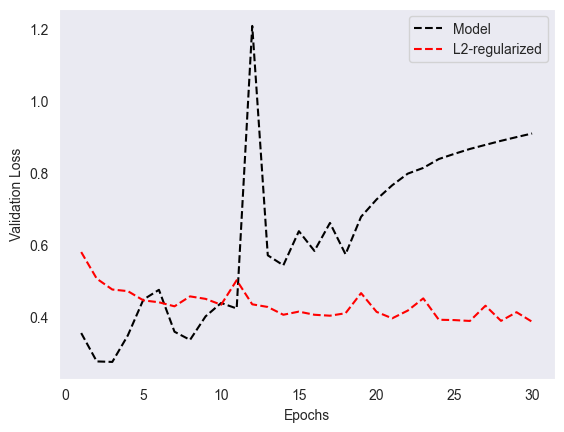

In [17]:
l2_val_loss = l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

L2 규제 방법은 기존 모델 결과와 비교해 Loss 값이 매우 낮게 감소되어 과대적합 문제를 해결하는 것을 알 수 있습니다.



#### L1 L2 규제

L1과 L2 규제를 같이 적용하는 방법도 존재하는데, 케라스에서 L1과 L2 규제를 같이 사용하기 위해서는 적용할 레이어에서 kernel_regularizer를 l1_l2로 지정해주면 됩니다.

In [18]:
l1_l2_model =  models.Sequential()
l1_l2_model.add(layers.Dense(16,
                             kernel_regularizer='l1_l2',
                             activation='relu', input_shape=(10000, )))
l1_l2_model.add(layers.Dense(16,
                             kernel_regularizer='l1_l2',
                             activation='relu'))
l1_l2_model.add(layers.Dense(1, activation='sigmoid'))
l1_l2_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
l1_l2_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                160016    
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train,
                                  epochs=30,
                                  batch_size=512,
                                  validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 2s 44ms/step - loss: 3.8856 - accuracy: 0.5412 - val_loss: 2.0303 - val_accuracy: 0.5771
Epoch 2/30
49/49 [==============================] - 1s 12ms/step - loss: 1.9418 - accuracy: 0.6070 - val_loss: 1.8609 - val_accuracy: 0.5172
Epoch 3/30
49/49 [==============================] - 1s 12ms/step - loss: 1.8136 - accuracy: 0.6478 - val_loss: 1.7669 - val_accuracy: 0.6783
Epoch 4/30
49/49 [==============================] - 1s 13ms/step - loss: 1.7116 - accuracy: 0.6630 - val_loss: 1.6594 - val_accuracy: 0.6767
Epoch 5/30
49/49 [==============================] - 1s 12ms/step - loss: 1.6334 - accuracy: 0.6805 - val_loss: 1.6078 - val_accuracy: 0.6929
Epoch 6/30
49/49 [==============================] - 1s 12ms/step - loss: 1.5755 - accuracy: 0.6953 - val_loss: 1.5452 - val_accuracy: 0.7037
Epoch 7/30
49/49 [==============================] - 1s 12ms/step - loss: 1.5302 - accuracy: 0.7021 - val_loss: 1.5155 - val_accuracy: 0.7199
Epoch 8/30
49

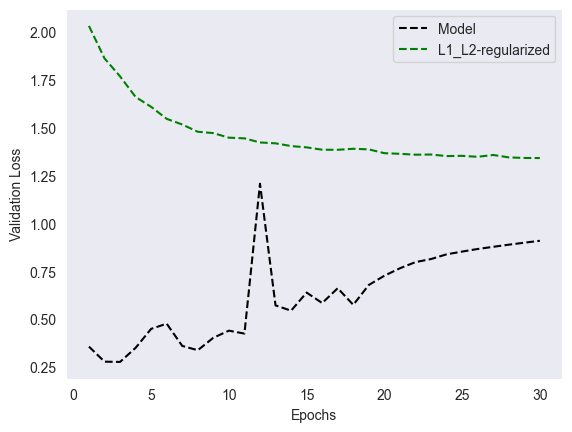

In [20]:
l1_l2_val_loss = l1_l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

L1 L2 규제를 함께 사용하는 경우는 L1 규제와 큰 차이가 없는 것을 알 수 있습니다.

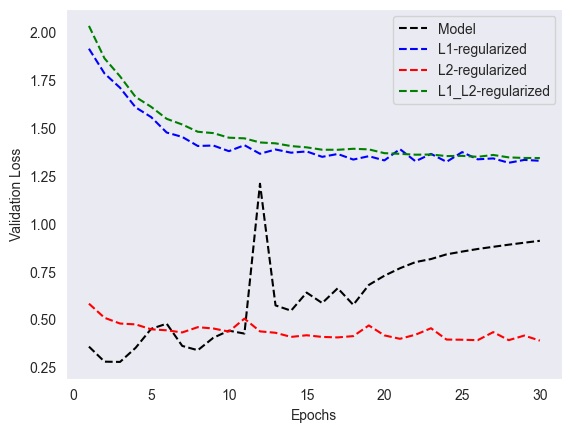

In [21]:
epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

전체 규제 방법들을 다 비교해보면, L2 규제가 가장 좋은 결과를 보여주고 있습니다. 물론 어떤 모델에 어떤 규제 방법이 좋을지는 실험을 통해 찾아가는 과정이 필요합니다.

위에서 다양한 종류의 규제를 사용해 보았지만 영상에서도 언급했듯이 큰 규제 값을 줄 수도 있고 작은 규제 값을 줄 수도 있습니다. 위에서 실험한 결과 가장 좋아 보인 L2 규제라도 어떤 규제 값을 주느냐에 따라 결과가 달라질 것입니다.